## Population plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
from sklearn.metrics import r2_score

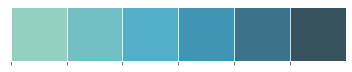

In [3]:
# IMPORT DATA FROM STATISTICS DENMARK
sns.palplot(sns.mpl_palette("GnBu_d"))


resp = requests.get('http://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en')

dst_url_a = 'http://api.statbank.dk/v1/data/FT/CSV?lang=en&TID=*'
data = pd.read_csv(dst_url_a, sep=';')

data.rename(columns={'INDHOLD':'Population', 'TID':'Year'}, inplace=True)

p1976_now = data.Year >=1976

extra_years = [y for y in np.arange(2020,2055,5) if y>data.Year.max()]
data = data.append(pd.DataFrame(extra_years,columns=['Year']), sort=False)

# CHOOSE YEAR CUT-OFF
p1975 = data.Year < 1976
year_now = pd.Timestamp.now().year
p_now = data.Year <= year_now

In [4]:
def make_pop_plot(period = p1975):
    f, ax = plt.subplots(figsize=(10,5))

    ax.scatter(data[period].Year, 
               data[period].Population / 10**6, 
               c='black', 
               label='Population')
    
    return f, ax


### Before 1970

Text(0, 0.5, 'Population, mil.')

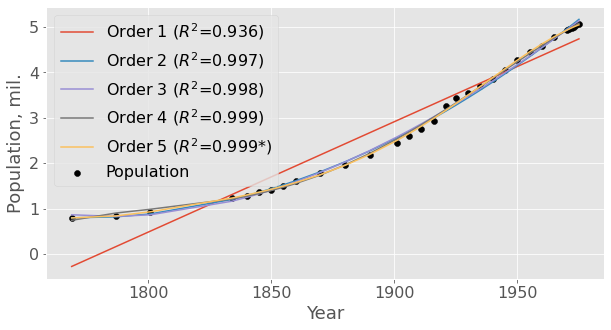

In [5]:
# PLOT ACTUAL DATA UP UNTIL 1975
f_pop1, ax = make_pop_plot()

# DEFINE YEARS AND ASSOCIATED POP. IN MILLIONS UP UNTIL 1975
x = data[p1975].Year
y_t = data.loc[p1975, 'Population'] / 10 **6

# DEFINE AND FIT 5 MODELS; OBTAIN R^2 FOR EACH
models = {}
r2s = []

for d in range(5):    
    models[d] = np.polyfit(x, y_t, deg=d+1)
    r2s.append(r2_score(y_t, np.polyval(models[d], x)))

# OBTAIN PREDICTED VALUES AND RECALCULATE R^2 BASED BY COMPARING TO TRUE DATA; PLOT ALONG WITH LABEL
for d in range(5):    
    v = 'Order %i' % (d+1) 
    y_p = np.polyval(models[d], x)    
    r2 = r2_score(y_t, y_p)
    
    plot_label = v + (' ($R^2$=%.3f%s)' % (r2, {True:'*', False:''}[r2>=max(r2s)]))
    ax.plot(x, y_p, label=plot_label)

# PLOT SPECIFICATIONS    
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')

# SAVE PLOT

### Forecast: until now

<ipython-input-6-dd4ffd570b4f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_2 = data[p1976_now].Year


Text(0, 0.5, 'Population, mil.')

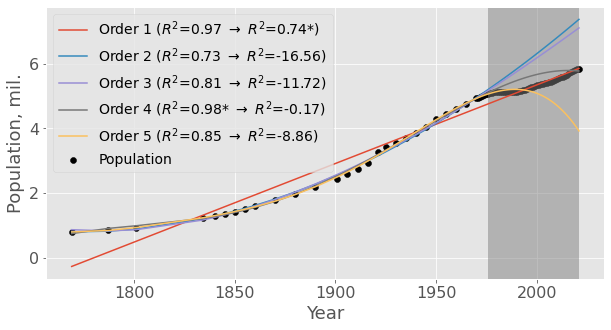

In [6]:
# PLOT ACTUAL DATA UP UNTIL 2021
f_pop2, ax = make_pop_plot(p_now)

# DEFINE YEARS AND ASSOCIATED POP. IN MILLIONS UP UNTIL 2021
x_1 = data[p_now].Year
x_2 = data[p1976_now].Year
y_1_t = data.loc[p_now, 'Population'] / 10 **6
y_2_t = data.loc[p1976_now, 'Population'] / 10 **6

# FIT 5 MODELS; OBTAIN R^2 FOR EACH
r2s_1 = []
r2s_2 = []

for d in range(5):     
    r2s_1.append(r2_score(y_1_t, np.polyval(models[d], x_1)))
    r2s_2.append(r2_score(y_2_t, np.polyval(models[d], x_2)))

for d in range(5):    
    v = 'Order %i' % (d+1) 
    y_1_p = np.polyval(models[d], x_1) 
    r2_1 = r2_score(y_1_t, y_1_p)
    y_2_p = np.polyval(models[d], x_2)    
    r2_2 = r2_score(y_2_t, y_2_p)
    
    plot_label = (v + ' ($R^2$=%.2f%s ' % (r2_1, {True:'*', False:''}[r2_1>=max(r2s_1)])) +r'$\rightarrow$' + (' $R^2$=%.2f%s)' % (r2_2, {True:'*', False:''}[r2_2>=max(r2s_2)]))
    ax.plot(x_1, y_1_p, label=plot_label)


ax.axvspan(1976, year_now, facecolor='gray', alpha=0.5)     
    
ax.legend(fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')

### Forecast: until 2050

Text(0, 0.5, 'Population, mil.')

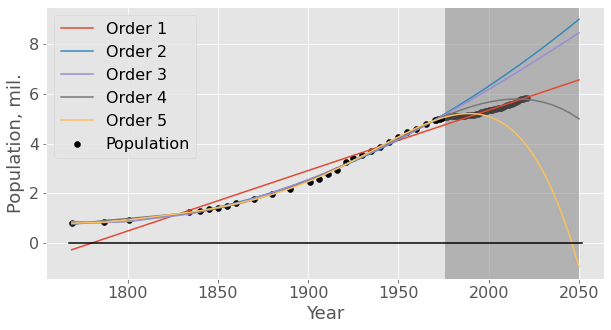

In [7]:
f_pop3, ax = make_pop_plot(p_now)

x = data[:].Year
y_t = data.loc[:, 'Population'] / 10 **6

for d in range(5):
    v = 'Order %i' % (d+1)         
    y_p = np.polyval(models[d], x)    
    ax.plot(x, y_p, label=v)

ax.axhline(0, 0.04, .96, color='black')         
ax.axvspan(1976, 2050, facecolor='gray', alpha=0.5)     
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')